# จำนวนประชากรมีผลต่ออัตราผู้เสียชีวิตของในแต่ละรัฐมั้ย

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('datasets/covid_2020_2022.csv')
df

,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",State Code,Region,estimate base,2020,2021,2022
0,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,All Ages,21520.0,231602.0,17619.0,7411.0,356.0,32038.0,AL,South,5025369,5033094,5049196.0,5076181.0
1,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,Under 1 year,NaN,1491.0,19.0,NaN,NaN,24.0,AL,South,5025369,5033094,5049196.0,5076181.0
2,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,0-17 years,19.0,2691.0,45.0,NaN,NaN,67.0,AL,South,5025369,5033094,5049196.0,5076181.0
3,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,1-4 years,NaN,344.0,13.0,NaN,NaN,19.0,AL,South,5025369,5033094,5049196.0,5076181.0
4,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,5-14 years,NaN,453.0,11.0,NaN,NaN,16.0,AL,South,5025369,5033094,5049196.0,5076181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104035,12/01/2022,12/31/2022,By Month,2022.0,12.0,Wyoming,Female,50-64 years,NaN,32.0,NaN,NaN,0.0,NaN,WY,West,576844,577681,579636.0,581978.0
104036,12/01/2022,12/31/2022,By Month,2022.0,12.0,Wyoming,Female,55-64 years,NaN,25.0,NaN,NaN,0.0,NaN,WY,West,576844,577681,579636.0,581978.0
104037,12/01/2022,12/31/2022,By Month,2022.0,12.0,Wyoming,Female,65-74 years,NaN,35.0,NaN,NaN,NaN,NaN,WY,West,576844,577681,579636.0,581978.0
104038,12/01/2022,12/31/2022,By Month,2022.0,12.0,Wyoming,Female,75-84 years,NaN,48.0,NaN,NaN,NaN,NaN,WY,West,576844,577681,579636.0,581978.0


In [6]:
df['population average'] = (df['estimate base'] + df['2020'] + df['2021'] + df['2022']) / 4
df

,Start Date,End Date,Group,Year,Month,State,Sex,Age Group,COVID-19 Deaths,Total Deaths,...,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",State Code,Region,estimate base,2020,2021,2022,population average
0,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,All Ages,21520.0,231602.0,...,7411.0,356.0,32038.0,AL,South,5025369,5033094,5049196.0,5076181.0,5045960.00
1,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,Under 1 year,NaN,1491.0,...,NaN,NaN,24.0,AL,South,5025369,5033094,5049196.0,5076181.0,5045960.00
2,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,0-17 years,19.0,2691.0,...,NaN,NaN,67.0,AL,South,5025369,5033094,5049196.0,5076181.0,5045960.00
3,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,1-4 years,NaN,344.0,...,NaN,NaN,19.0,AL,South,5025369,5033094,5049196.0,5076181.0,5045960.00
4,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,5-14 years,NaN,453.0,...,NaN,NaN,16.0,AL,South,5025369,5033094,5049196.0,5076181.0,5045960.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104035,12/01/2022,12/31/2022,By Month,2022.0,12.0,Wyoming,Female,50-64 years,NaN,32.0,...,NaN,0.0,NaN,WY,West,576844,577681,579636.0,581978.0,579034.75
104036,12/01/2022,12/31/2022,By Month,2022.0,12.0,Wyoming,Female,55-64 years,NaN,25.0,...,NaN,0.0,NaN,WY,West,576844,577681,579636.0,581978.0,579034.75
104037,12/01/2022,12/31/2022,By Month,2022.0,12.0,Wyoming,Female,65-74 years,NaN,35.0,...,NaN,NaN,NaN,WY,West,576844,577681,579636.0,581978.0,579034.75
104038,12/01/2022,12/31/2022,By Month,2022.0,12.0,Wyoming,Female,75-84 years,NaN,48.0,...,NaN,NaN,NaN,WY,West,576844,577681,579636.0,581978.0,579034.75


In [9]:
land_df = pd.read_csv('datasets/us-state-land-area.csv')
area = land_df.loc[:, ['state', 'land_area_sq_mi']].rename(columns={'land_area_sq_mi': 'land_area'}).iloc[0:51]
area

,state,land_area
0,Alaska,570640.95
1,Texas,261231.71
2,California,155779.22
3,Montana,145545.80
4,New Mexico,121298.15
5,Arizona,113594.08
6,Nevada,109781.18
7,Colorado,103641.89
8,Oregon,95988.01
9,Wyoming,97093.14


In [15]:
df.rename(columns={'State': 'state'}, inplace=True)
df = pd.merge(df, area,on='state', how='left')
df

,Start Date,End Date,Group,Year,Month,state,Sex,Age Group,COVID-19 Deaths,Total Deaths,...,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",State Code,Region,estimate base,2020,2021,2022,population average,land_area
0,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,All Ages,21520.0,231602.0,...,356.0,32038.0,AL,South,5025369,5033094,5049196.0,5076181.0,5045960.00,50645.33
1,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,Under 1 year,NaN,1491.0,...,NaN,24.0,AL,South,5025369,5033094,5049196.0,5076181.0,5045960.00,50645.33
2,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,0-17 years,19.0,2691.0,...,NaN,67.0,AL,South,5025369,5033094,5049196.0,5076181.0,5045960.00,50645.33
3,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,1-4 years,NaN,344.0,...,NaN,19.0,AL,South,5025369,5033094,5049196.0,5076181.0,5045960.00,50645.33
4,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,5-14 years,NaN,453.0,...,NaN,16.0,AL,South,5025369,5033094,5049196.0,5076181.0,5045960.00,50645.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104035,12/01/2022,12/31/2022,By Month,2022.0,12.0,Wyoming,Female,50-64 years,NaN,32.0,...,0.0,NaN,WY,West,576844,577681,579636.0,581978.0,579034.75,97093.14
104036,12/01/2022,12/31/2022,By Month,2022.0,12.0,Wyoming,Female,55-64 years,NaN,25.0,...,0.0,NaN,WY,West,576844,577681,579636.0,581978.0,579034.75,97093.14
104037,12/01/2022,12/31/2022,By Month,2022.0,12.0,Wyoming,Female,65-74 years,NaN,35.0,...,NaN,NaN,WY,West,576844,577681,579636.0,581978.0,579034.75,97093.14
104038,12/01/2022,12/31/2022,By Month,2022.0,12.0,Wyoming,Female,75-84 years,NaN,48.0,...,NaN,NaN,WY,West,576844,577681,579636.0,581978.0,579034.75,97093.14


# 

In [16]:
df['population density'] = df['population average'] / df['land_area']
df

,Start Date,End Date,Group,Year,Month,state,Sex,Age Group,COVID-19 Deaths,Total Deaths,...,"Pneumonia, Influenza, or COVID-19 Deaths",State Code,Region,estimate base,2020,2021,2022,population average,land_area,population density
0,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,All Ages,21520.0,231602.0,...,32038.0,AL,South,5025369,5033094,5049196.0,5076181.0,5045960.00,50645.33,99.633273
1,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,Under 1 year,NaN,1491.0,...,24.0,AL,South,5025369,5033094,5049196.0,5076181.0,5045960.00,50645.33,99.633273
2,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,0-17 years,19.0,2691.0,...,67.0,AL,South,5025369,5033094,5049196.0,5076181.0,5045960.00,50645.33,99.633273
3,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,1-4 years,NaN,344.0,...,19.0,AL,South,5025369,5033094,5049196.0,5076181.0,5045960.00,50645.33,99.633273
4,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,5-14 years,NaN,453.0,...,16.0,AL,South,5025369,5033094,5049196.0,5076181.0,5045960.00,50645.33,99.633273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104035,12/01/2022,12/31/2022,By Month,2022.0,12.0,Wyoming,Female,50-64 years,NaN,32.0,...,NaN,WY,West,576844,577681,579636.0,581978.0,579034.75,97093.14,5.963704
104036,12/01/2022,12/31/2022,By Month,2022.0,12.0,Wyoming,Female,55-64 years,NaN,25.0,...,NaN,WY,West,576844,577681,579636.0,581978.0,579034.75,97093.14,5.963704
104037,12/01/2022,12/31/2022,By Month,2022.0,12.0,Wyoming,Female,65-74 years,NaN,35.0,...,NaN,WY,West,576844,577681,579636.0,581978.0,579034.75,97093.14,5.963704
104038,12/01/2022,12/31/2022,By Month,2022.0,12.0,Wyoming,Female,75-84 years,NaN,48.0,...,NaN,WY,West,576844,577681,579636.0,581978.0,579034.75,97093.14,5.963704


In [17]:
df['covid death rate'] = df['COVID-19 Deaths'] / df['population average']
df

,Start Date,End Date,Group,Year,Month,state,Sex,Age Group,COVID-19 Deaths,Total Deaths,...,State Code,Region,estimate base,2020,2021,2022,population average,land_area,population density,covid death rate
0,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,All Ages,21520.0,231602.0,...,AL,South,5025369,5033094,5049196.0,5076181.0,5045960.00,50645.33,99.633273,0.004265
1,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,Under 1 year,NaN,1491.0,...,AL,South,5025369,5033094,5049196.0,5076181.0,5045960.00,50645.33,99.633273,NaN
2,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,0-17 years,19.0,2691.0,...,AL,South,5025369,5033094,5049196.0,5076181.0,5045960.00,50645.33,99.633273,0.000004
3,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,1-4 years,NaN,344.0,...,AL,South,5025369,5033094,5049196.0,5076181.0,5045960.00,50645.33,99.633273,NaN
4,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,5-14 years,NaN,453.0,...,AL,South,5025369,5033094,5049196.0,5076181.0,5045960.00,50645.33,99.633273,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104035,12/01/2022,12/31/2022,By Month,2022.0,12.0,Wyoming,Female,50-64 years,NaN,32.0,...,WY,West,576844,577681,579636.0,581978.0,579034.75,97093.14,5.963704,NaN
104036,12/01/2022,12/31/2022,By Month,2022.0,12.0,Wyoming,Female,55-64 years,NaN,25.0,...,WY,West,576844,577681,579636.0,581978.0,579034.75,97093.14,5.963704,NaN
104037,12/01/2022,12/31/2022,By Month,2022.0,12.0,Wyoming,Female,65-74 years,NaN,35.0,...,WY,West,576844,577681,579636.0,581978.0,579034.75,97093.14,5.963704,NaN
104038,12/01/2022,12/31/2022,By Month,2022.0,12.0,Wyoming,Female,75-84 years,NaN,48.0,...,WY,West,576844,577681,579636.0,581978.0,579034.75,97093.14,5.963704,NaN


In [31]:
state_unique_df = df[(df['Age Group'] == 'All Ages') & (df['Sex'] == 'All Sexes') & (df['Group'] == 'By Total')]
state_unique_df

,Start Date,End Date,Group,Year,Month,state,Sex,Age Group,COVID-19 Deaths,Total Deaths,...,State Code,Region,estimate base,2020,2021,2022,population average,land_area,population density,covid death rate
0,01/01/2020,09/23/2023,By Total,NaN,NaN,Alabama,All Sexes,All Ages,21520.0,231602.0,...,AL,South,5025369,5033094,5049196.0,5076181.0,5045960.00,50645.33,99.633273,0.004265
51,01/01/2020,09/23/2023,By Total,NaN,NaN,Alaska,All Sexes,All Ages,1492.0,20039.0,...,AK,West,733395,733017,734420.0,734442.0,733818.50,570640.95,1.285955,0.002033
102,01/01/2020,09/23/2023,By Total,NaN,NaN,Arizona,All Sexes,All Ages,30307.0,284393.0,...,AZ,West,7158110,7187135,7274078.0,7377566.0,7249222.25,113594.08,63.816902,0.004181
153,01/01/2020,09/23/2023,By Total,NaN,NaN,Arkansas,All Sexes,All Ages,12663.0,140174.0,...,AR,South,3011553,3014546,3026870.0,3047704.0,3025168.25,52035.48,58.136645,0.004186
204,01/01/2020,09/23/2023,By Total,NaN,NaN,California,All Sexes,All Ages,109248.0,1178346.0,...,CA,West,39555674,39521958,39142565.0,39142414.0,39340652.75,155779.22,252.541082,0.002777
255,01/01/2020,09/23/2023,By Total,NaN,NaN,Colorado,All Sexes,All Ages,15378.0,176094.0,...,CO,West,5775324,5787129,5814036.0,5850935.0,5806856.00,103641.89,56.028079,0.002648
306,01/01/2020,09/23/2023,By Total,NaN,NaN,Connecticut,All Sexes,All Ages,12571.0,130502.0,...,CT,Northeast,3607701,3579918,3606607.0,3617925.0,3603037.75,4842.36,744.066478,0.003489
357,01/01/2020,09/23/2023,By Total,NaN,NaN,Delaware,All Sexes,All Ages,3445.0,41037.0,...,DE,South,989955,991928,1005062.0,1020625.0,1001892.50,1948.54,514.175998,0.003438
408,01/01/2020,09/23/2023,By Total,NaN,NaN,District of Columbia,All Sexes,All Ages,2231.0,25770.0,...,DC,South,689545,670917,669256.0,676725.0,676610.75,61.05,11082.895168,0.003297
459,01/01/2020,09/23/2023,By Total,NaN,NaN,Florida,All Sexes,All Ages,81894.0,915140.0,...,FL,South,21538192,21592035,21831949.0,22379312.0,21835372.00,53624.76,407.188247,0.003751


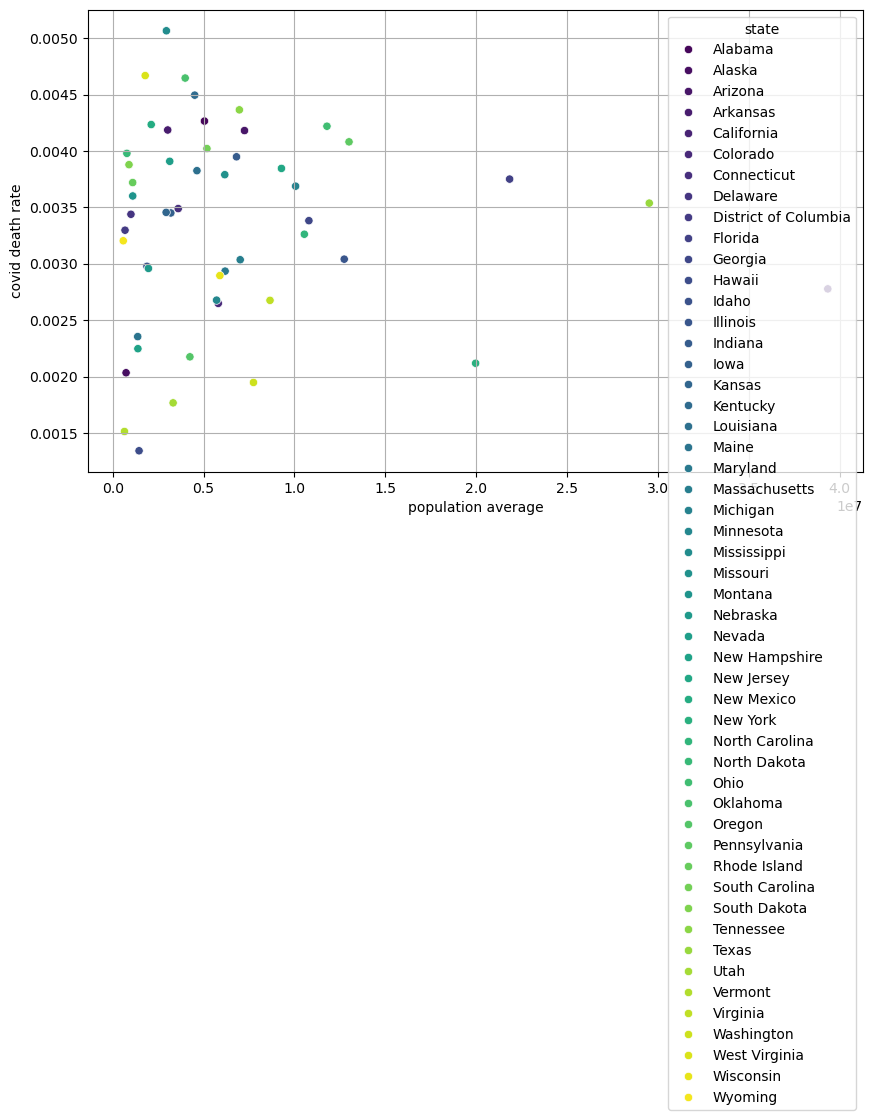

In [45]:
# สร้างกราฟ scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data = state_unique_df, x='population average', y='covid death rate', hue='state', palette='viridis')

# แสดงกราฟ
plt.grid(True)
plt.show()

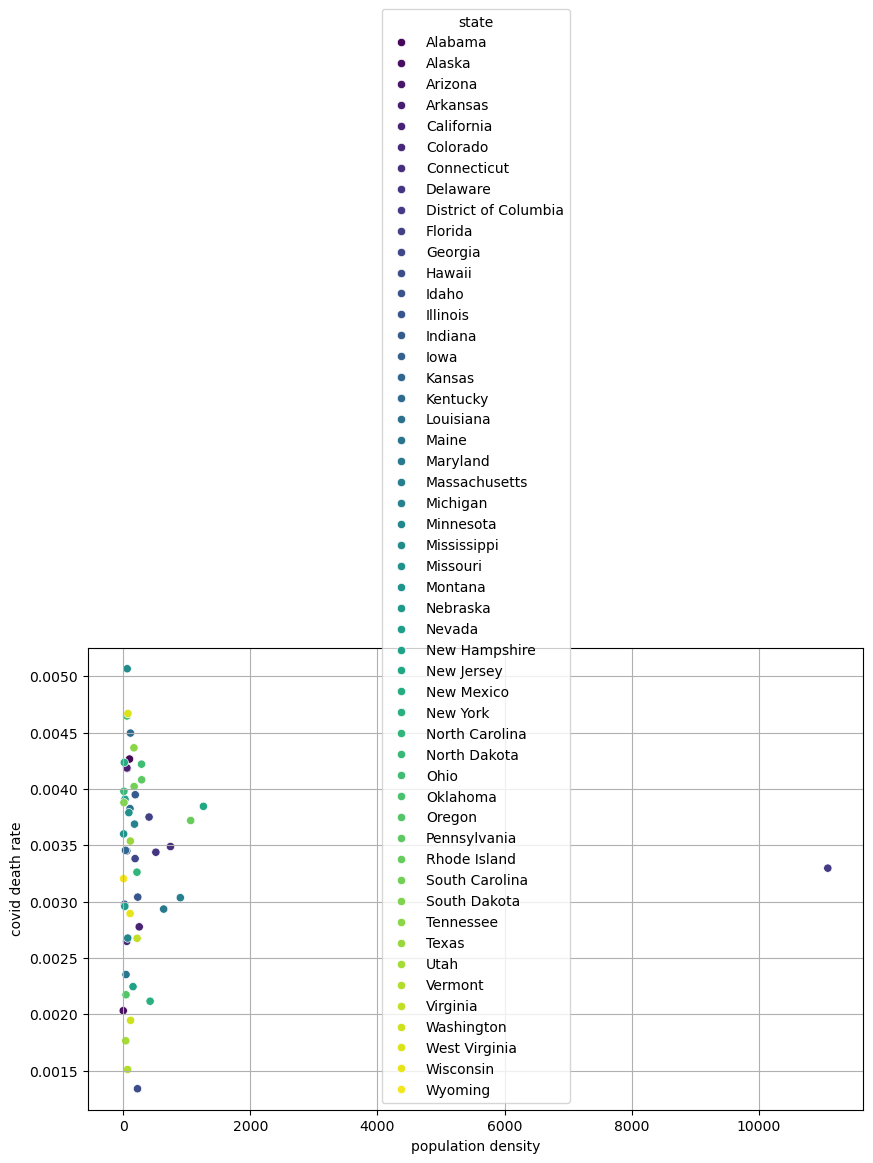

In [46]:
# สร้างกราฟ scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data = state_unique_df, x='population density', y='covid death rate', hue='state', palette='viridis')

# แสดงกราฟ
plt.grid(True)
plt.show()

# Hypothesis testing

### H0 : Population density ของแต่ละ State ไม่มีผลต่อ covid death rate
### H1 : Population density ของแต่ละ State ผลต่อ covid death rate

#### alpha = 0.01

In [43]:
# คำนวณค่า correlation ระหว่าง population density และ covid death rate
population_density = state_unique_df['population density']
covid_death_rate = state_unique_df['covid death rate']

# Pearson correlation
corr, p_value = pearsonr(population_density, covid_death_rate)

print(f"Pearson Correlation: {corr}")
print(f"P-value: {p_value}")

# สรุปผล
if p_value < 0.01:
    print("ปฎิเสธสมมติฐาน H0: มีความสัมพันธ์ที่มีนัยสำคัญระหว่างความหนาแน่นของประชากรและอัตราการเสียชีวิตจาก COVID-19")
else:
    print("ยอมรับสมมติฐาน H0: ไม่มีความสัมพันธ์ที่มีนัยสำคัญระหว่างความหนาแน่นของประชากรและอัตราการเสียชีวิตจาก COVID-19")

Pearson Correlation: -0.00441927251120372
P-value: 0.975446872833972
ยอมรับสมมติฐาน H0: ไม่มีความสัมพันธ์ที่มีนัยสำคัญระหว่างความหนาแน่นของประชากรและอัตราการเสียชีวิตจาก COVID-19
